In [1]:
import numpy as np
import matplotlib.pyplot as plt
from RK4 import *

In [2]:
#Constants [L] = AU, [T] = years, [M] = solar mass 
G = 1.; M = 1.; c = 1.;
Rs = 2*G*M/(c**2)

In [3]:
def f(t0, q0):
    t=q0[0]; r=q0[1]; theta=q0[2]; phi=q0[3]
    dt=q0[4]; dr=q0[5]; dtheta=q0[6]; dphi=q0[7]
    f = np.zeros(8)
    f[0] = dt
    f[1] = dr
    f[2] = dtheta
    f[3] = dphi    
    f[4] = -2*G*M*dr*dt/(r*(r-2*G*M))
    f[5] = -G*M*dt**2*(r-2*G*M)/(r**3)+G*M*dr**2/(r*(r-2*G*M))+(r-2*G*M)*(dtheta**2+(np.sin(theta)*dphi)**2)
    f[6] = -2*dtheta*dr/r+np.sin(theta)*np.cos(theta)*dphi**2
    f[7] = -2*(dphi*dr/r+np.cos(theta)*dtheta*dphi/np.sin(theta))
    return f

In [4]:
def eff_potential(r,epsilon,L):
    return (1 - 2*G*M/r)*(L**2/r**2 + epsilon)

In [5]:
T = 100. # GM/c^3
t0 = 0
tf = 3*T
n = 100000

t = np.linspace(t0,tf,n)
h = (tf - t0)/n
qs = 6
Q = np.zeros([n,qs,8])

In [16]:
b0 = np.array([3,3,5,7,9,11])
x0 = np.array([30,0,30,30,30,30])
L0 = b0; L0[1] = np.sqrt(27) 
E0 = (np.ones(qs)-2*G*M/np.sqrt(x0**2+b0**2))
E0[1] = np.sqrt(eff_potential(b0[1],0,L0[1]))
for i in range(qs):
    x00 = x0[i]; b=b0[i]
    r0 = np.sqrt(x00**2+b**2); phi0=np.arccos(x00/r0)
    E00 = E0[i] 
    dr0 = -x00/r0
    L00 = L0[i]
    dt0 = E00/(1-2/r0); dphi0 = L00/(r0**2)
    Q[0,i,0] = t0
    Q[0,i,1] = r0
    Q[0,i,2] = np.pi*0.5
    Q[0,i,3] = phi0

    Q[0,i,4] = dt0
    Q[0,i,5] = dr0
    Q[0,i,6] = 0.
    Q[0,i,7] = dphi0

ValueError: x and y must be the same size

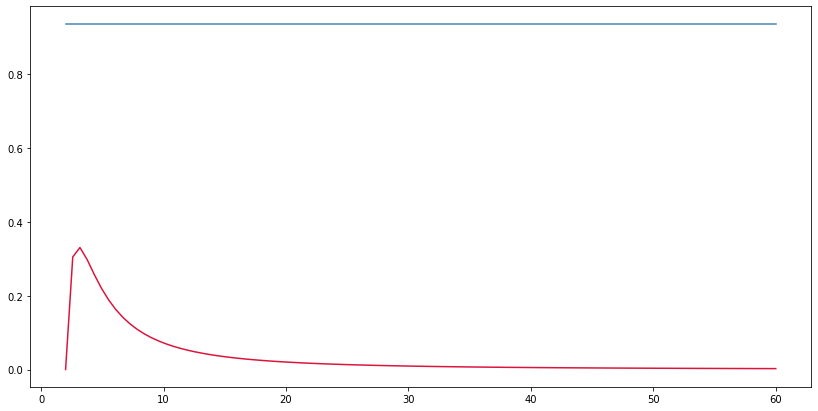

In [13]:
r = np.linspace(Rs,30*Rs,100)
#V = eff_potential(r,1.,L0)
plt.figure(figsize=(14,7))
#plt.plot(r,np.zeros(len(r)),color='black')
plt.plot(r,eff_potential(r,0.,L0[0]),color='crimson',label=f'$V(r)$')
plt.plot(r,E0*np.ones(len(r)),color='steelblue',label='$E$')
plt.scatter(r0,eff_potential(r0,0.,L0),marker='o')
#plt.scatter(rmin,eff_potential(rmin,1.,L0),marker='o')
#plt.scatter(rmax,eff_potential(rmax,1.,L0),marker='o')
#plt.xlim([rq[1],rq[0]])
#plt.ylim([E0-0.01,E0+0.01])
plt.xlabel('$r$')
plt.ylabel('$V$')
plt.legend()
plt.show()

In [17]:
%%time
for i in range(1,n):
    for j in range(qs):
        q0 = Q[i-1,j]
        Q[i,j] = RK4(f, h, 0, q0)
        #if Q[i,j,1] <= Rs:
        #    print(f'chocó!')
        #    break
    

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: 

CPU times: user 1min 41s, sys: 2.71 s, total: 1min 44s
Wall time: 1min 40s


/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


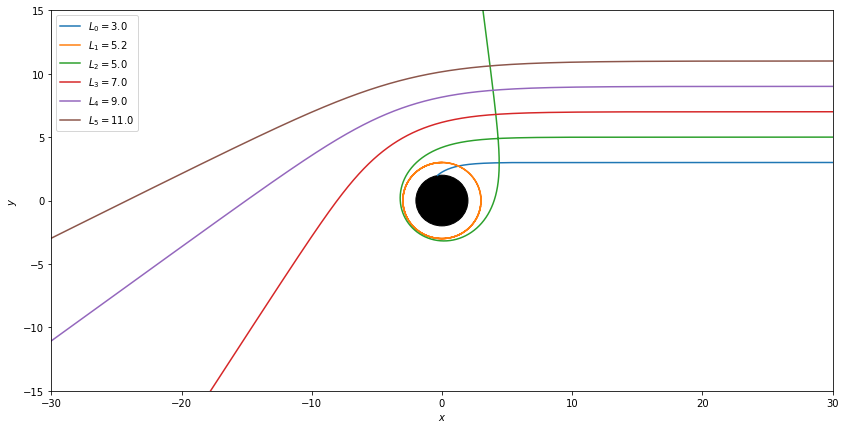

In [22]:
tc=n-1
ti = 9880
ang = np.linspace(0,2*np.pi,100)
fig, ax = plt.subplots(1,1,figsize=(14,7))
for i in range(6):
    if i<2:
        tc = ti 
    else:
        tc = n-1
    x = Q[0:tc,i,1]*np.cos(Q[0:tc,i,3])*np.sin(Q[0:tc,i,2])
    y = Q[0:tc,i,1]*np.sin(Q[0:tc,i,3])*np.sin(Q[0:tc,i,2])
    ax.plot(x, y, label=f'$L_{i}= {L0[i]:.1f}$')
#plt.plot(Rs*np.cos(ang),Rs*np.sin(ang),color='black')
#plt.scatter(0,0,marker='o',color='black')
blackHole = plt.Circle((0, 0), Rs, color='k')
ax.add_patch(blackHole)
ax.set_xlim([-30,30])
ax.set_ylim([-15,15])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
plt.savefig('BendingLinght.png')
plt.show()

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(Q[0:tc,0], Q[0:tc,4]*(1-2/Q[0:tc,1]), color = 'red',label = r'$E(\tau)$')
ax[0].set_xlabel('$\tau$')
ax[0].set_ylabel('$E$')
ax[0].legend()

ax[1].plot(Q[0:tc,0], Q[0:tc,7]*Q[0:tc,1]**2, color = 'red',label = r'$L(\tau)$')
ax[0].set_xlabel('$\tau$')
ax[0].set_ylabel('$L$')
ax[1].legend()

plt.show()

In [ ]:
Q[tc,4]*(1-2/Q[tc,1]) - Q[0,4]*(1-2/Q[0,1])

In [ ]:
Q[tc,7]*Q[tc,1]**2 - Q[0,7]*Q[0,1]**2

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(Q[0:tc,0], Q[0:tc,1], color = 'red',label = r'$r(\tau)$')
ax[0].set_xlabel('$\tau$')
ax[0].set_ylabel('$r$')
ax[0].legend()

ax[1].plot(Q[0:tc,0], Q[0:tc,3], color = 'red',label = r'$\phi(\tau)$')
ax[0].set_xlabel('$\tau$')
ax[0].set_ylabel('$\phi$')
ax[1].legend()

plt.show()